<a href="https://colab.research.google.com/github/ProfAndersonVanin/FATEC_MINERACAO_DADOS_2SEM2024/blob/main/Nome_Completo_Aqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Luigi Falcade de Souza**

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

## **Importando as bibliotecas pandas, numy, matplotlib e seaborn que irei utilizar**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Importação de Bibliotecas: O código começa importando as bibliotecas essenciais para análise de dados e visualização. O pandas é usado para manipular e analisar dados em tabelas. O numpy é voltado para operações numéricas e manipulação de arrays. O matplotlib (com o pyplot) é para criar gráficos, enquanto o seaborn facilita a criação de visualizações mais atraentes e informativas. A linha sns.set() configura o estilo padrão do seaborn.

## **Criando uma variável para receber o dataset (utilizando a biblioteca pandas)**

In [4]:
df = pd.read_csv ("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## **Mostrando os nomes das colunas**

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Neste trecho de código está sendo utilizando o método df.columns, que retorna uma lista com os nomes das colunas do DataFrame df.

## **Mostrando informações importantes, como: numero de registros e também valores nulos que poderão ser descartados afim de minimizar erros futuros**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


O df.info() fornece:
Número de Entradas: Mostra quantas linhas (ou entradas) estão presentes no DataFrame.
Número de Colunas: Indica quantas colunas existem.
Nomes das Colunas: Lista os nomes de todas as colunas.
Tipos de Dados: Mostra os tipos de dados de cada coluna (por exemplo, int, float, object).
Valores Não Nulos: Informa quantos valores não nulos existem em cada coluna, ajudando a identificar colunas com dados ausentes.

## **Com o comando describe() irei fazer uma pré análise estatística dos valores numéricos**

In [7]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


O describe() mostra uma distribuição de pontos para uma garrafa de vinho, onde o minimo é 80 e o máximo é 100. Também é possível notar que a garrafa de vinho mais barata custa 4 dólares  e a mais cara 3.300 dólares

## **Por meio da função value_counts() pode-se perceber e contar quantos vinhos foram avaliados por cada pais**

In [8]:
df ["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


Nota-se que a maioria dos vinhos avaliados é dos EUA, França, Itália, Espanha e Portugal

## **Utilizando o value_counts, podemos verificar quais tipos de uva  foram mais utilizadas na fabricação dos vinhos avaliados**

In [9]:
df ["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


por serem muitos dados, mostra apenas os 5 primeiros e últimos

## **Limpeza de Dados**

Agora que já foi verificado, pode-se concluir os campos que não serão necessários para análise e por isso modem ser removidos: unimed 0, designation, region_1, region_2. taster_name e taster_twitter_handle

1° passo: fazer uma cópia do Dataframe, utilizando a função copy()

In [10]:
df1 = df.copy()

agora que já foi feita uma cópia, irei remover as que não irei utilizar na análise:

In [11]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


ainda temos o problema dos dados ausentes

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


pode-se fazer alguns cálculos de proporção na coluna de preço que é muito importante para a análise e que apresenta dados ausentes

Antes, podemos saber o tamanho do base de dados

In [13]:
df1.shape

(129971, 8)

Assim, df1.shape informa que o DataFrame possui 129.971 entradas (linhas) e 8 colunas. Essa informação é útil para ter uma noção rápida do tamanho do seu conjunto de dados.

In [14]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


O que o código faz:
Contagem de Valores Não Nulos: df1["price"].count() conta quantos valores não nulos existem na coluna "price".
Proporção: A divisão df1["price"].count() / df1.shape[0] calcula a fração de entradas não nulas em relação ao total de linhas do DataFrame.
Formatação: "{:.0%}".format(...) formata essa fração como uma porcentagem, arredondando para zero casas decimais.
Exibição: O resultado é impresso, mostrando a porcentagem de valores não nulos na coluna "price".

Conclui-se que mesmo que apagando todos os registros nulos, ainda ficamos com 93% de todaa base

Se removermos as linhas com valores nulos da coluna preço (price), ficaremos com 93% das linhas restantes. Como a base de dados é suficiente e grande, podemos remover essas linhas filtrando também por país e uvas (country e variety) que também contém dados nulos.

In [15]:
df1 = df1.dropna (subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Remoção de Linhas com Dados Ausentes: O método dropna(subset=["country", "price", "variety"]) remove todas as linhas em que qualquer uma das colunas especificadas ("country", "price" ou "variety") contém um valor ausente. Isso é importante para garantir que as análises subsequentes não sejam afetadas por dados faltantes nessas colunas críticas.

## **Análise Exploratória**

Para começar uma análise, sempre é bom começar olhando para os gráficos e visualizando os dados, por isso, inicarei pela distribuição dos pontos

Text(0, 0.5, 'Frequência')

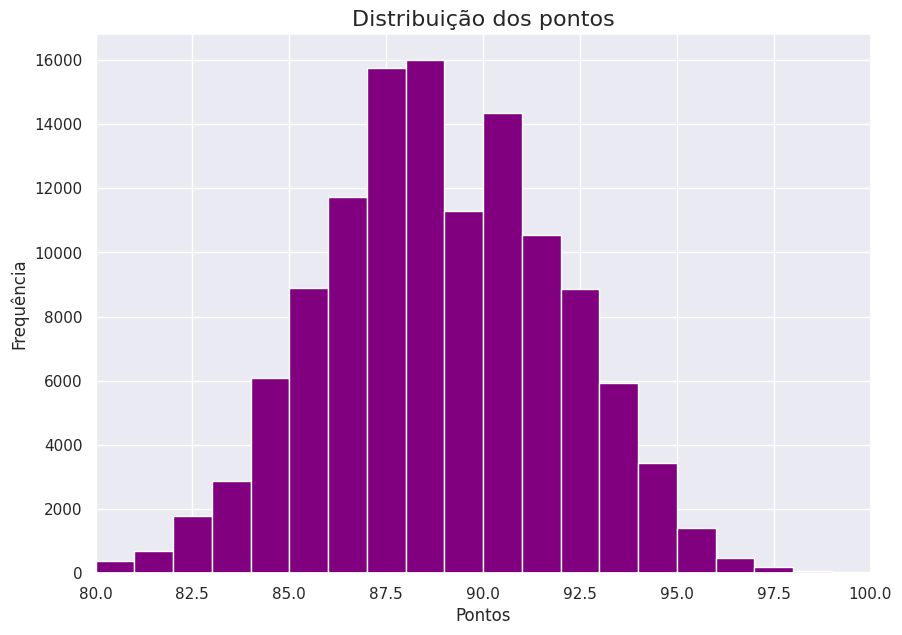

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1,  x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'purple')
plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

Analisando a pontuação dos vinhos por um gráfico de histograma para saber a distribuição desses pontos. Os dados que utilizei foi do dataframe1. O eixo X simbolizando os porntos e o eixo Y a frenquência

Agora, pode-se analisar quais são os países que estão no top 10 que mais produzem vinho

In [17]:
country_top_10=df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Analisando esses múmeros podemos criar um gráfico de barras para uma melhor visualização

Text(0, 0.5, 'Toatal de avaliações')

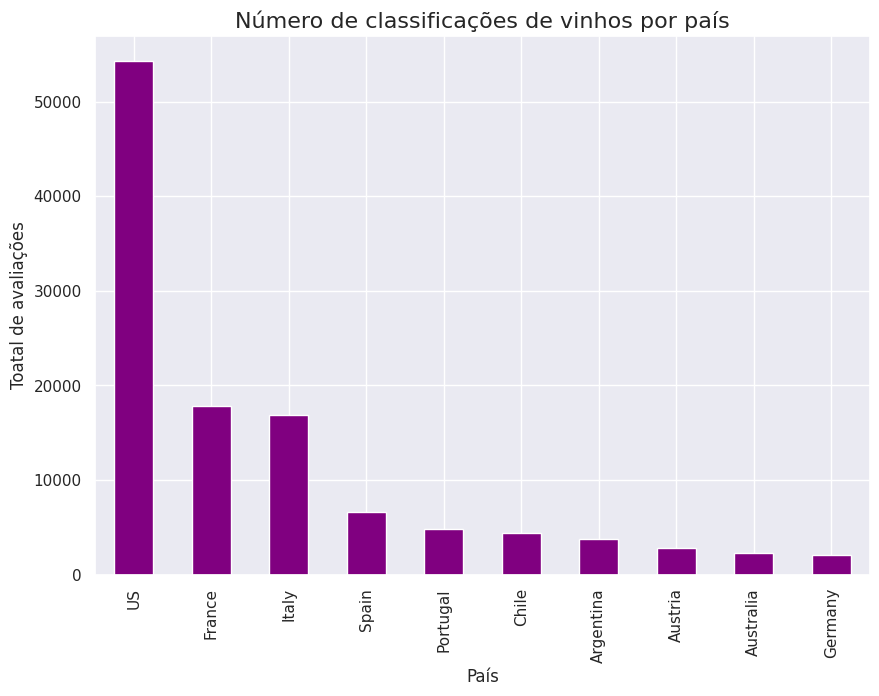

In [18]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color = 'purple')
plt.title('Número de classificações de vinhos por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Toatal de avaliações')

São os mesmo dados, porém desta vez, vista por barras. Sendo desta maneira, o eixo X simbolizando os países e o eixo Y o total de avaliações.

Com base no gráfico acima, pode investigar quantos países produzem vinho de melhor qualidade de acordo com as classificações.

In [20]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
# converter em uma serie o dataframe usando o método to_frame()
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


Agrupamento por País: df1.groupby("country")['points'].agg("mean") agrupa os dados do DataFrame df1 pela coluna "country" e calcula a média da coluna "points" para cada país.

Ordenação: melhor_qualidade.sort_values(ascending=False)[:10] classifica os países pela média de pontos em ordem decrescente e seleciona os 10 países com a maior média.

Conversão para DataFrame: melhor_qualidade.to_frame() converte a série resultante em um DataFrame, permitindo aplicar estilos.

Estilização: .style.background_gradient(cmap='Purples', high=0.5) aplica um gradiente de fundo ao DataFrame, usando a paleta de cores "Purples" para destacar os valores, com um foco nos valores mais altos.

<ipython-input-21-8bc9ed78155f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

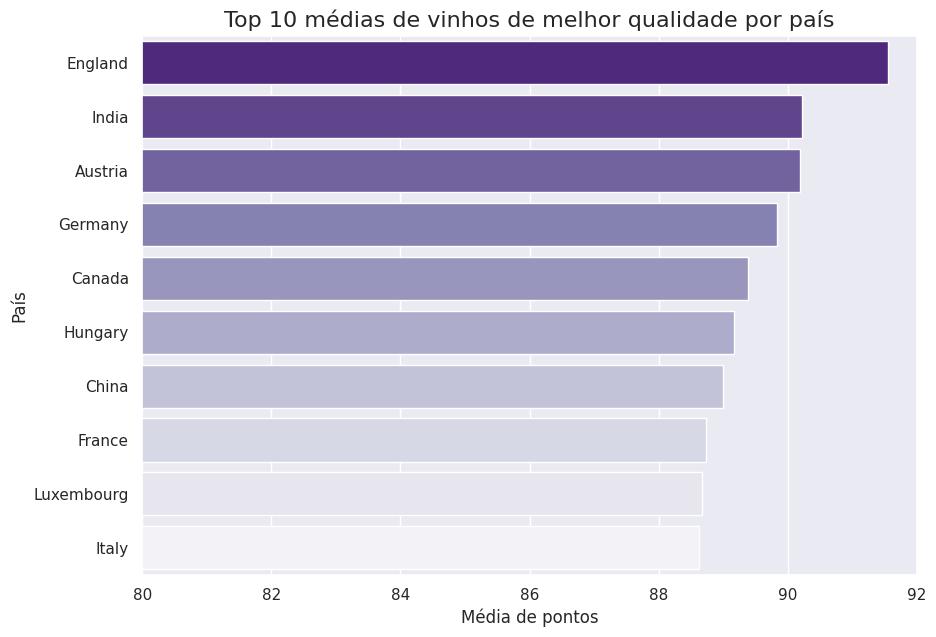

In [21]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title ('Top 10 médias de vinhos de melhor qualidade por país', fontsize = 16)
plt.xlabel('Média de pontos')
plt.ylabel('País')

Ao verificar a média de pontos, pode-se perceber que o país com melhor avaliação(que produziu o vinho de melhor qualidade) foi a Inglaterra. Isso, ocorre, porque talvez haja menos vinhos da Inglaterra no Dataframe e eles tenham uma pontuação alta, representando um aumento na média. Podemos investigar isso:

In [22]:
# número de vinhos por país com classificações mais altas 95-100
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Os países com classificação mais alta 95-100, diferem do gráfico de pontuação mais alta com base na média. Como essa base de dados apresenta mais vinhos  avaliados dos EUA, é provável que haja uma grande quantidade de vinho do país, enquanto a Inglaterra, apresenta menos vinhos na base de dados

Para concluir essa questão, pode-se criar um gráfico boxplot

Text(0, 0.5, 'País')

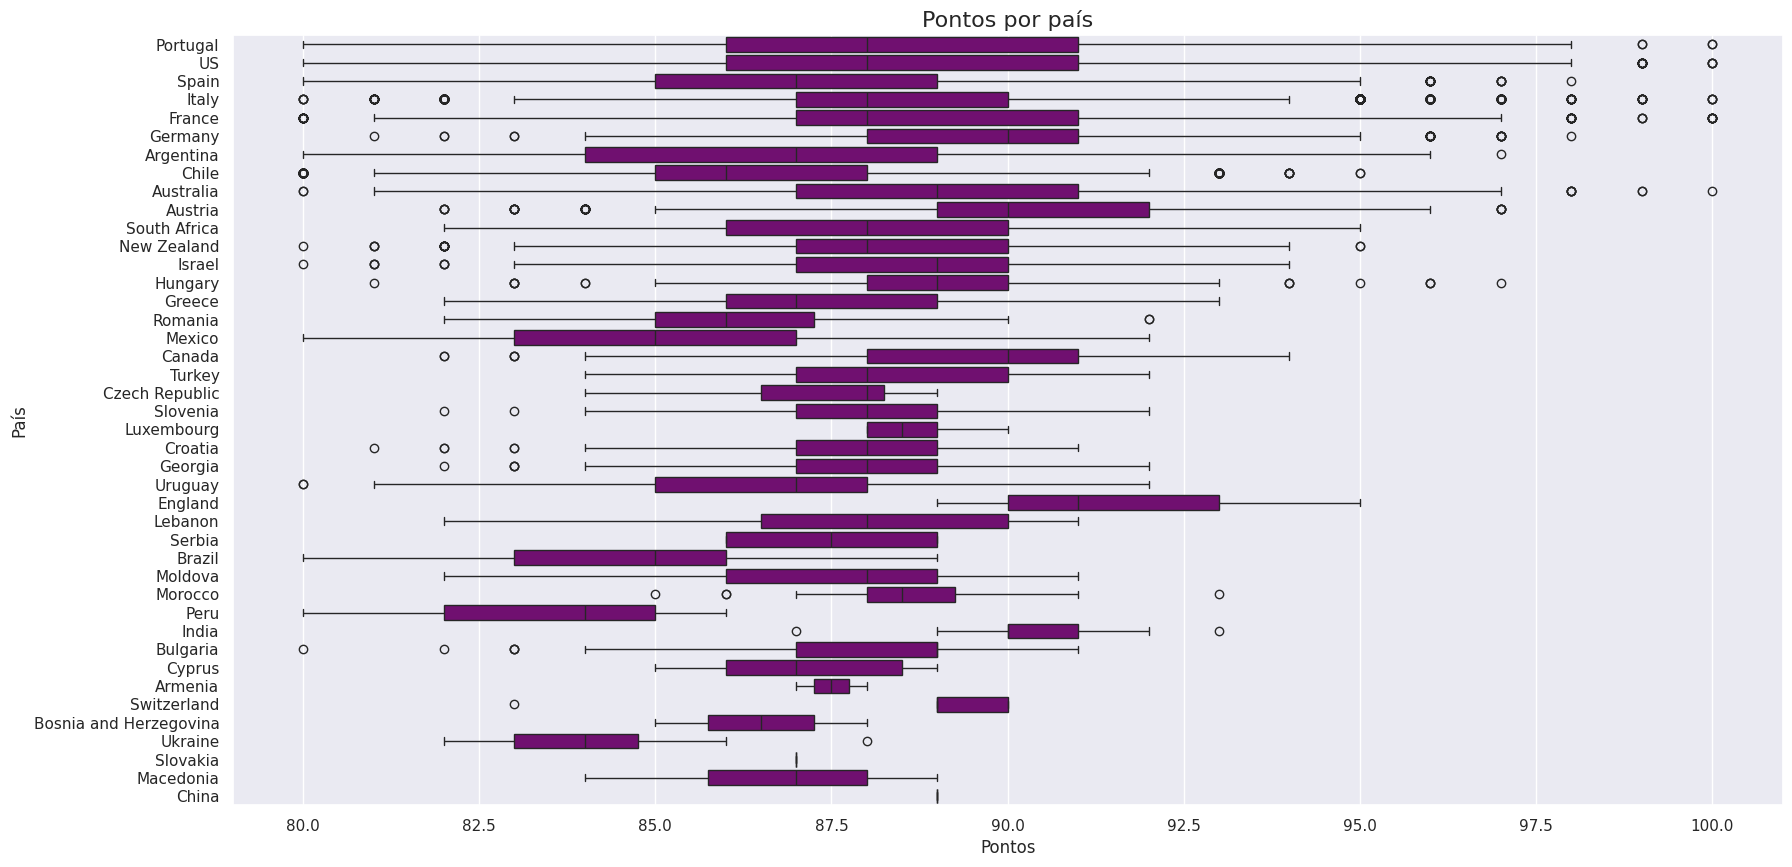

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color = 'Purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')

Embora os vinhos da Inglaterra tenham os pontos mais altos em média, os vinhos de Portugal, EUA, Itália, França e Austrália, receberam uma pontuação perfeita de 100. Há mais vinhos deste países na base de dados, portanto eles receberam uma gama maior de ponto.

Agora, pode ser investigado o preço dos vinhos nos países:

<ipython-input-30-a6bfa689aaa1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples')  # Ou 'Blues', 'Greens', etc.


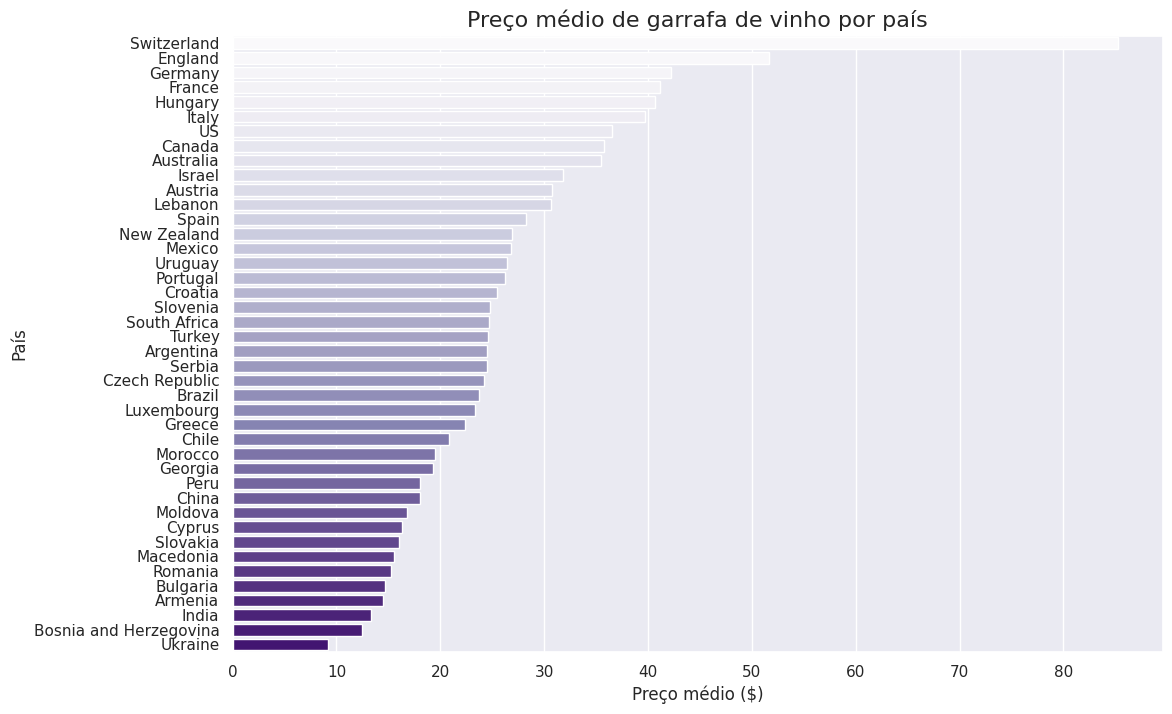

In [30]:
average_price = df1.groupby("country")['price'].mean()
average_price = average_price.sort_values(ascending=False)

# Ajustar a criação de y e x
y = average_price.index
x = average_price.values

plt.figure(figsize=(12, 8))

# Usar uma paleta disponível
sns.barplot(x=x, y=y, palette='Purples')  # Ou 'Blues', 'Greens', etc.

plt.title('Preço médio de garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')
plt.show()  # Mostre o gráfico


A suiça produz o vinho mais caro, com o preço médio de garrafa de mais de 80 dólares. Já o vinho da ucrânia, está no outro extremo, com o preço médio mais baixo, 10 dólares a garrafa. Ou seja, podemos investigar se o preço do vinho está relacionado com a qualidade

Text(0, 0.5, 'Frequência')

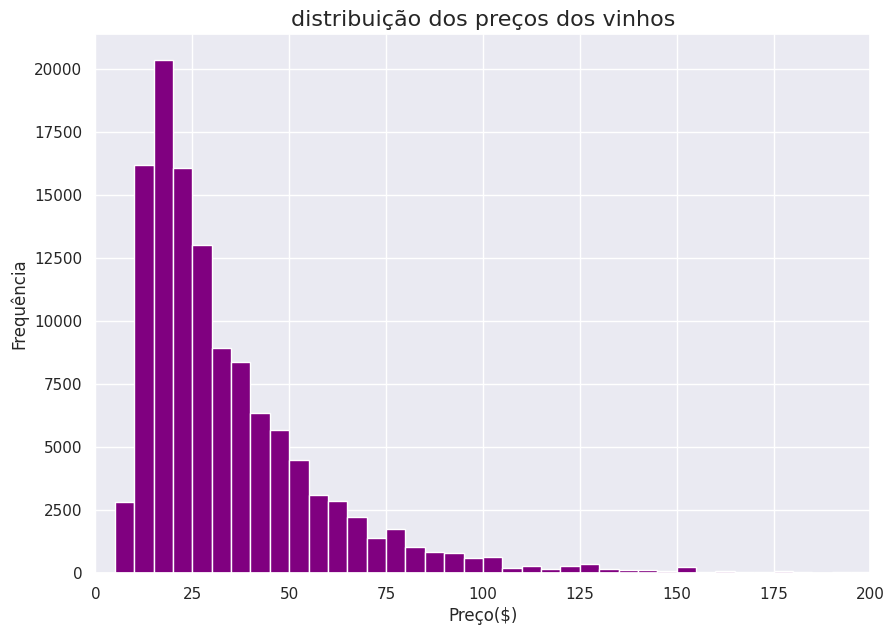

In [31]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x="price", bins=bins, color = 'Purple')
plt.xlim(0,200)
plt.title('distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')

Configuração da Figura: plt.figure(figsize=(10, 7)) define o tamanho do gráfico como 10 polegadas de largura e 7 polegadas de altura.

Definição dos Intervalos (Bins):

bins = np.arange(0, df1["price"].max()+5, 5) cria um array que define os limites dos intervalos para o histograma, começando em 0 até o valor máximo de preço, com intervalos de 5. Isso ajuda a agrupar os preços em faixas.
Criação do Histograma:

plt.hist(data=df1, x="price", bins=bins, color='Purple') plota o histograma, onde:
data=df1 indica que os dados vêm do DataFrame df1.
x="price" especifica que a variável a ser plotada no eixo x é o preço.
bins=bins define os intervalos de preços.
color='Purple' define a cor das barras do histograma como roxa.
Limites do Eixo X: plt.xlim(0, 200) estabelece que o eixo x deve mostrar apenas a faixa de preços de 0 a 200 dólares.

Adição de Títulos e Rótulos:

plt.title('Distribuição dos preços dos vinhos', fontsize=16) define o título do gráfico.
plt.xlabel('Preço ($)') e plt.ylabel('Frequência') adicionam rótulos aos eixos x e y, respectivamente.

In [32]:
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


Count: O número total de valores não nulos na coluna "price".
Mean: A média dos preços.
Std: O desvio padrão dos preços, que indica a variabilidade dos dados.
Min: O preço mínimo.
25%: O primeiro quartil (25% dos preços estão abaixo desse valor).
50% (Median): O segundo quartil (mediana), que é o valor que divide a distribuição ao meio.
75%: O terceiro quartil (75% dos preços estão abaixo desse valor).
Max: O preço máximo

In [33]:
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


tranformação logarítmica -> histograma

Text(0, 0.5, 'Frequência')

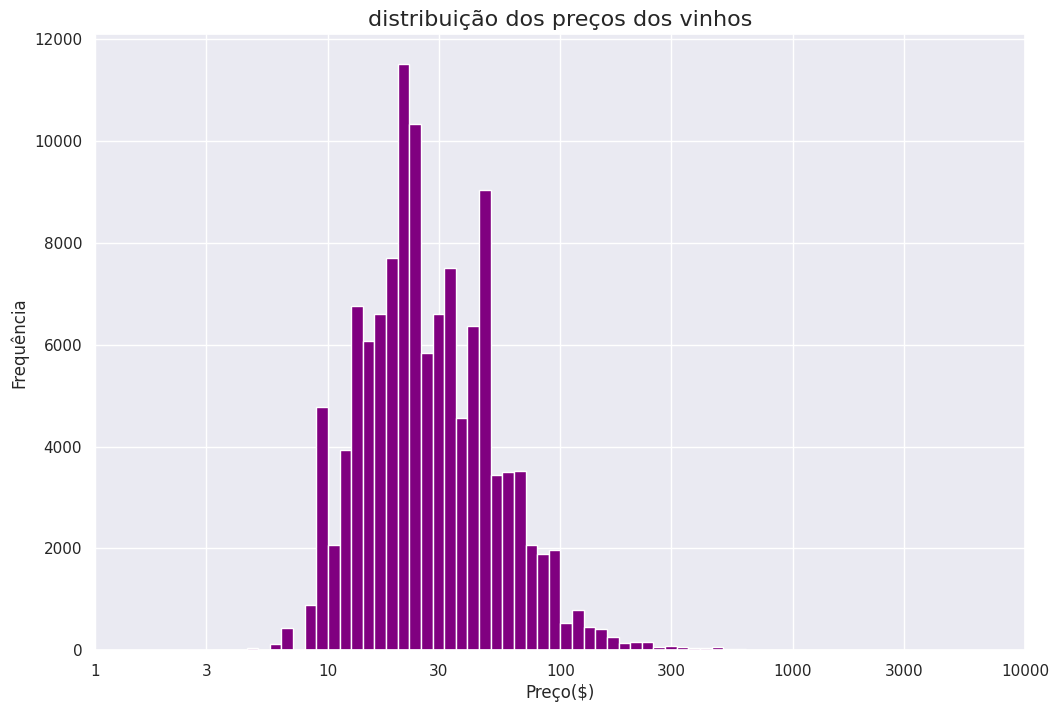

In [34]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')

Existe um salto na região dos 10 dólares e um pico mais visível em pouco mais d 20 dólares. Depois, tem outro pico acima de 50 dólares. Agora, podemos colocar o gráfico tipo scatter para visualizar se existe uma correlação entre a pontuação da garrafa

Text(0, 0.5, 'Pontos')

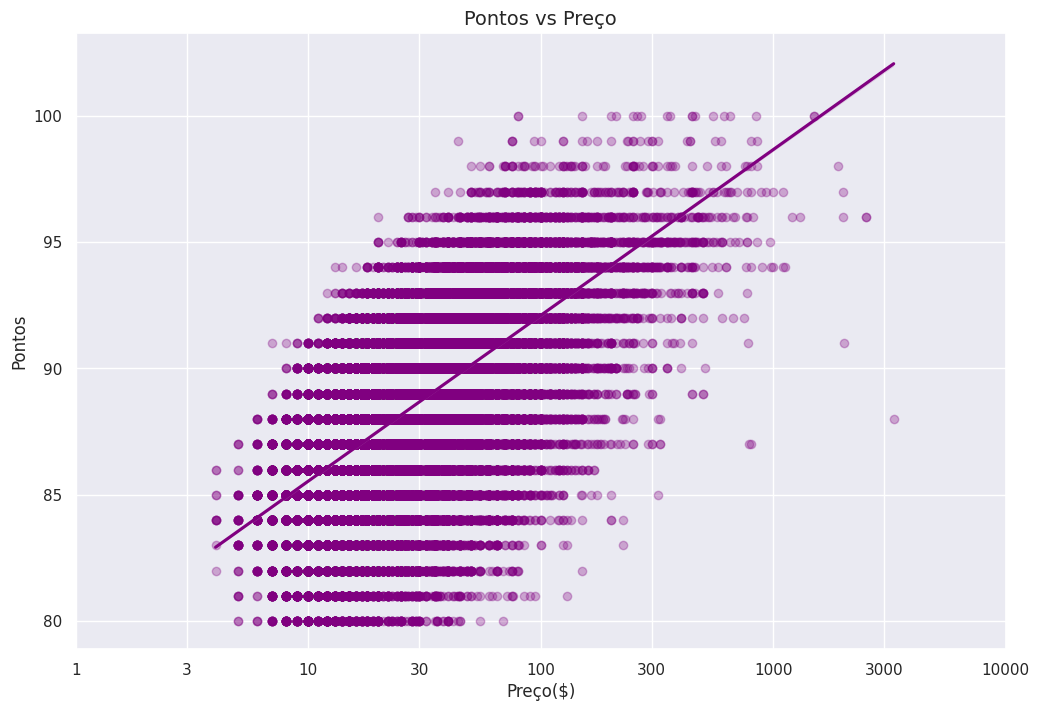

In [35]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos vs Preço', fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço($)')
plt.ylabel('Pontos')

O gráfico mostra uma relação positiva entre as duas variáveis (pontuação e preço), ou seja, vinhos mais caros tendem a receber melhores avaliações.Também é possível observar dois pontos mais afastados, uma na região dos 4 dólares e outro na região dos 3000 dólares. Listarei esses dois valores para descobrir quais são esses, buscando pelo valor máximo e mínimo:

In [37]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [38]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Temos um vinho espanhol com 85 pontos de classificação e que custa 4 dólares, enquanto temos um vinho francês com 88 pontos de classificação e custando 3300 dólares. Por isso, pode-se pesquisar pelos 20 melhores vinhos e ver como eles pontuam.

In [39]:
df1["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Contagem das Variedades:

df1["variety"].value_counts() conta quantas vezes cada variedade de vinho aparece na coluna "variety".
Seleção das 20 Mais Comuns:

[:20] limita o resultado às 20 variedades mais frequentes.
O resultado será uma série que mostra as 20 variedades de vinho com o maior número de avaliações, permitindo você identificar quais são as mais populares no conjunto de dados

Agora, um gráfico de boxplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

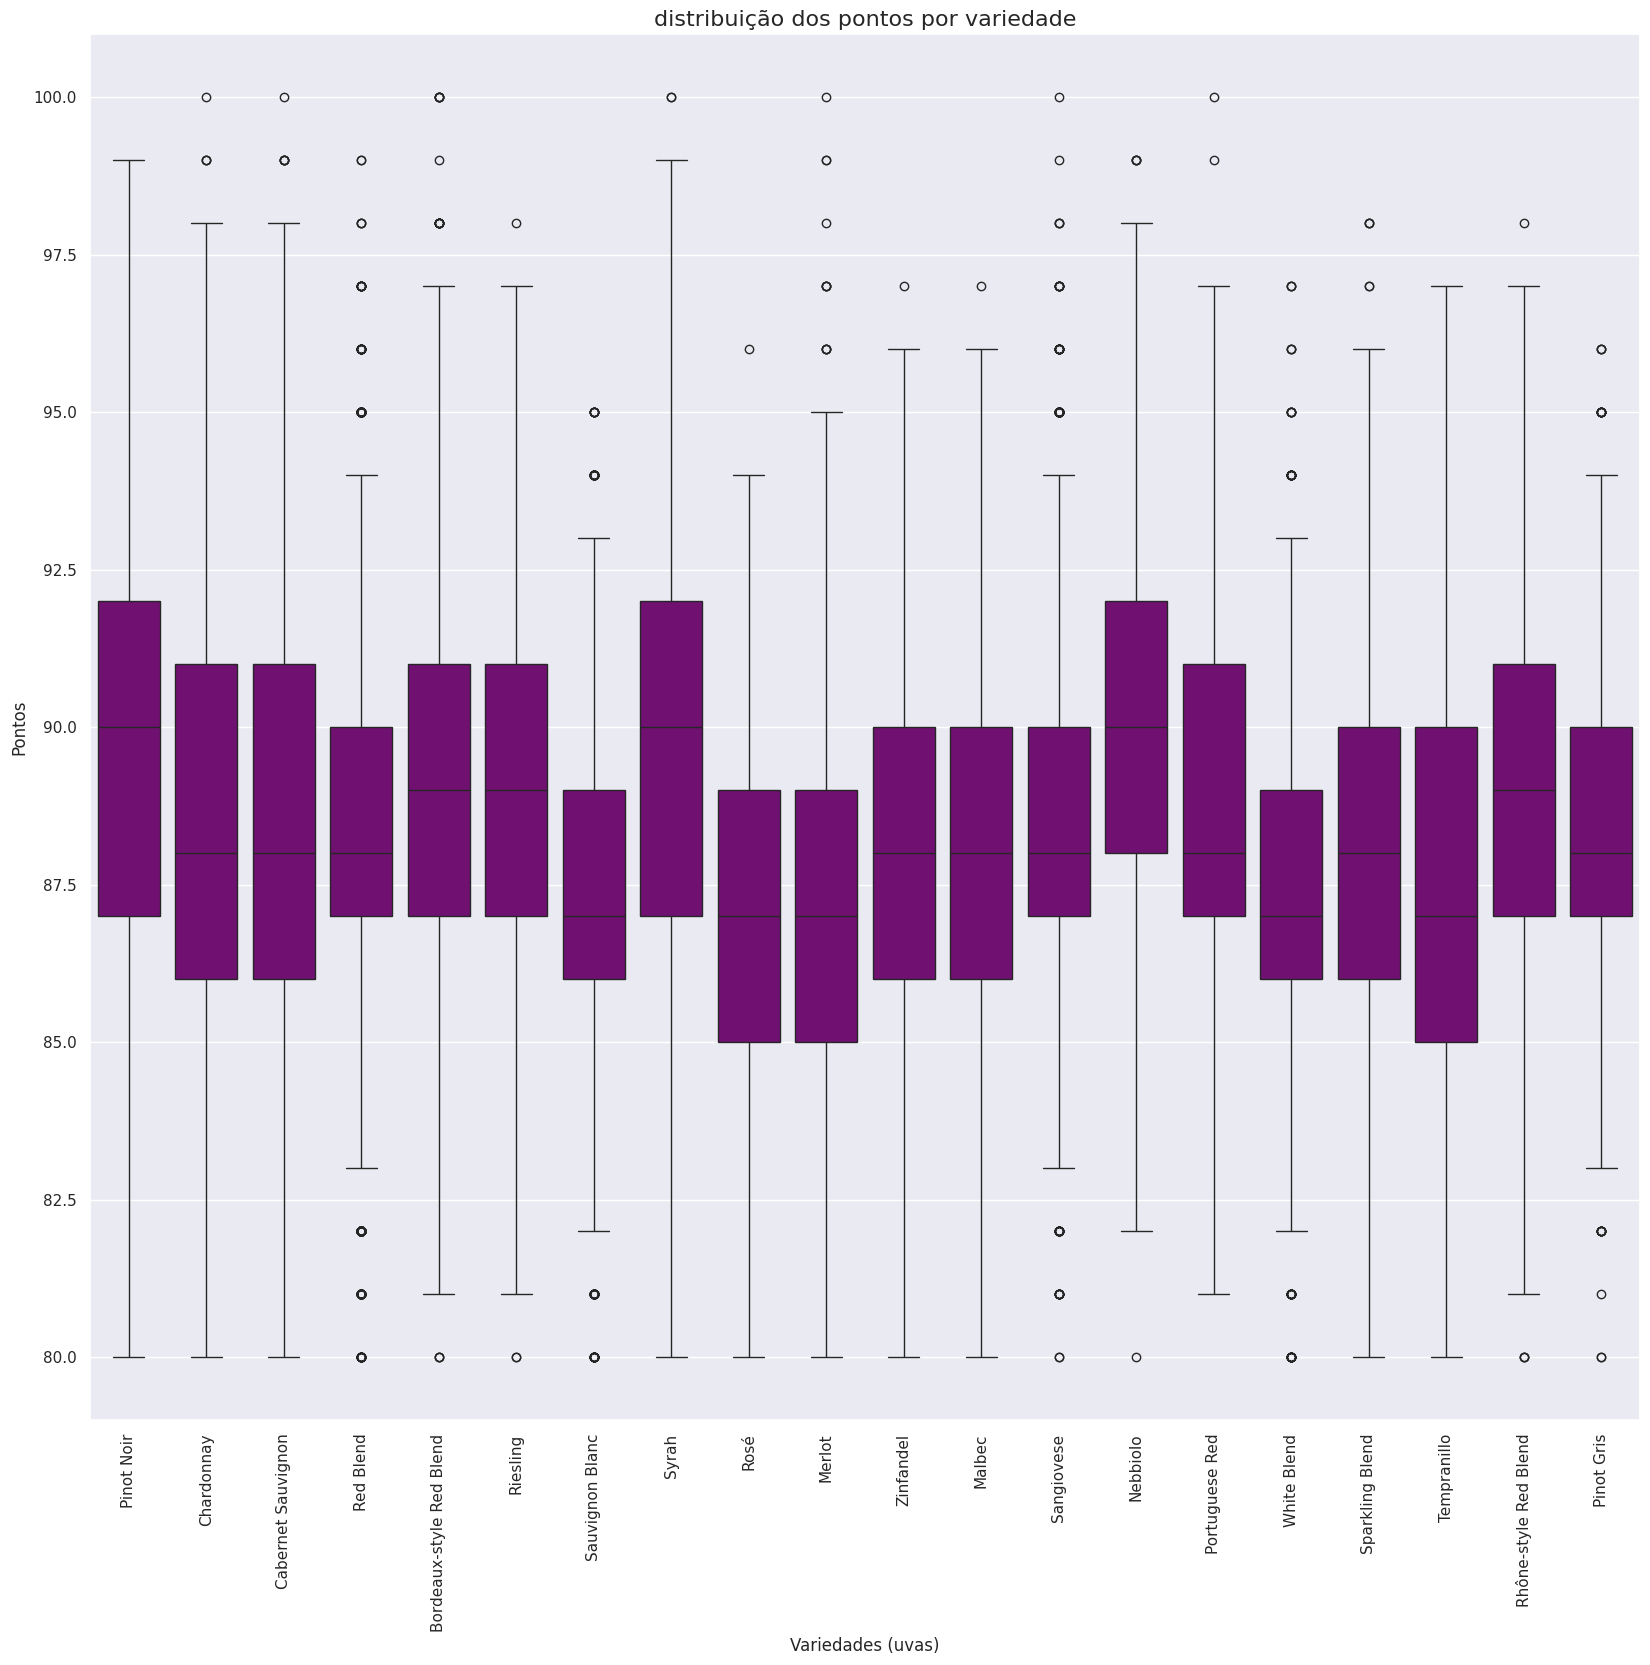

In [40]:
plt.figure(figsize=(20, 18))
sns.boxplot (data=df1,
             x='variety',
             y='points',
             color="Purple",
             order=df1["variety"].value_counts().iloc[:20].index)
plt.title('distribuição dos pontos por variedade', fontsize=16)
plt.xlabel('Variedades (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

Listando o top 20 melhores vinhos de acordo com a classificação na base de dados, dá par perceber que a variedade Pinot Noir tende ter o melhor desempenho, com a pontuação média mais alta.
Como já foi visto, a quailidade está fortemente relacionnada com o preço, porém nem todo mundo tem 3000 dólares para gastar com vinho, por esse motivo, irei descobrir o melhor custo benefício em algumas faixas de valores

até 15 dólares -
entre 15 e 30 dólares -
entre 30 e 50 dólares -
acima de 50 dólares

In [45]:
# Filtrando e preparando os dados
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False).head(10)

# Aplicando o estilo
styled_df = under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])
styled_df


,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


POdemos perceber que uma ótima escolha seria o vinho português de 94 pontos custando apenas 13 euros

In [48]:
# Filtrando e preparando os dados
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query ("price > 15 and price <= 30")
between_15_and_30= between_15_and_30.sort_values(by="points", ascending=False).head(10)

# Aplicando o estilo
styled_df = between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])
styled_df

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


Já nessa lista, se o cliente estiver disposto a gastar um pouco mais. A melhor opção seria um vinho dos EUA com a pontuação de 96 e custando 20 dólares.

In [49]:
# Filtrando e preparando os dados
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query ("price > 30 and price <= 50")
between_30_and_50= between_30_and_50.sort_values(by="points", ascending=False).head(10)

# Aplicando o estilo
styled_df = between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])
styled_df

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


Nesse filto é possível levar um vinho americano de pontuação 99 por 44 dólares

In [50]:
# Filtrando e preparando os dados
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query ("price > 50")
above_50= above_50.sort_values(by="points", ascending=False)[:10]

# Aplicando o estilo
styled_df = above_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])
styled_df

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


Por 80 dólares é possível experimentar um vinho de 100 pontos

Agora, olhando de um outro ponto de vista, dá para descubrir quais palavras são mais utilizadas  para descrever um vinho. Para isso deve-se usar a biblioteca wordcloud que separa cada palavra em um texto e nos permite filtrar as de maior ocorrência, gerando uma nuvem de palavras.

In [51]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1["description"][1]
text = " ".join(i for i in df1["description"])
len(text)

29653210

Temos agora um imenso texto agrupado. A biblioteca disponibiliza uma funcionalidade chamada stopwords que são uma lista de palavras que serão eliminadas no processo da criação da nuvem de palavras

In [52]:
stopwords = set (STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=1024,
                      max_words=1000).generate(text)

Agora só é preciso plotar uma imagem exibindo as palavras mais utilizadas na descrição de vinhos

(-0.5, 2047.5, 1023.5, -0.5)

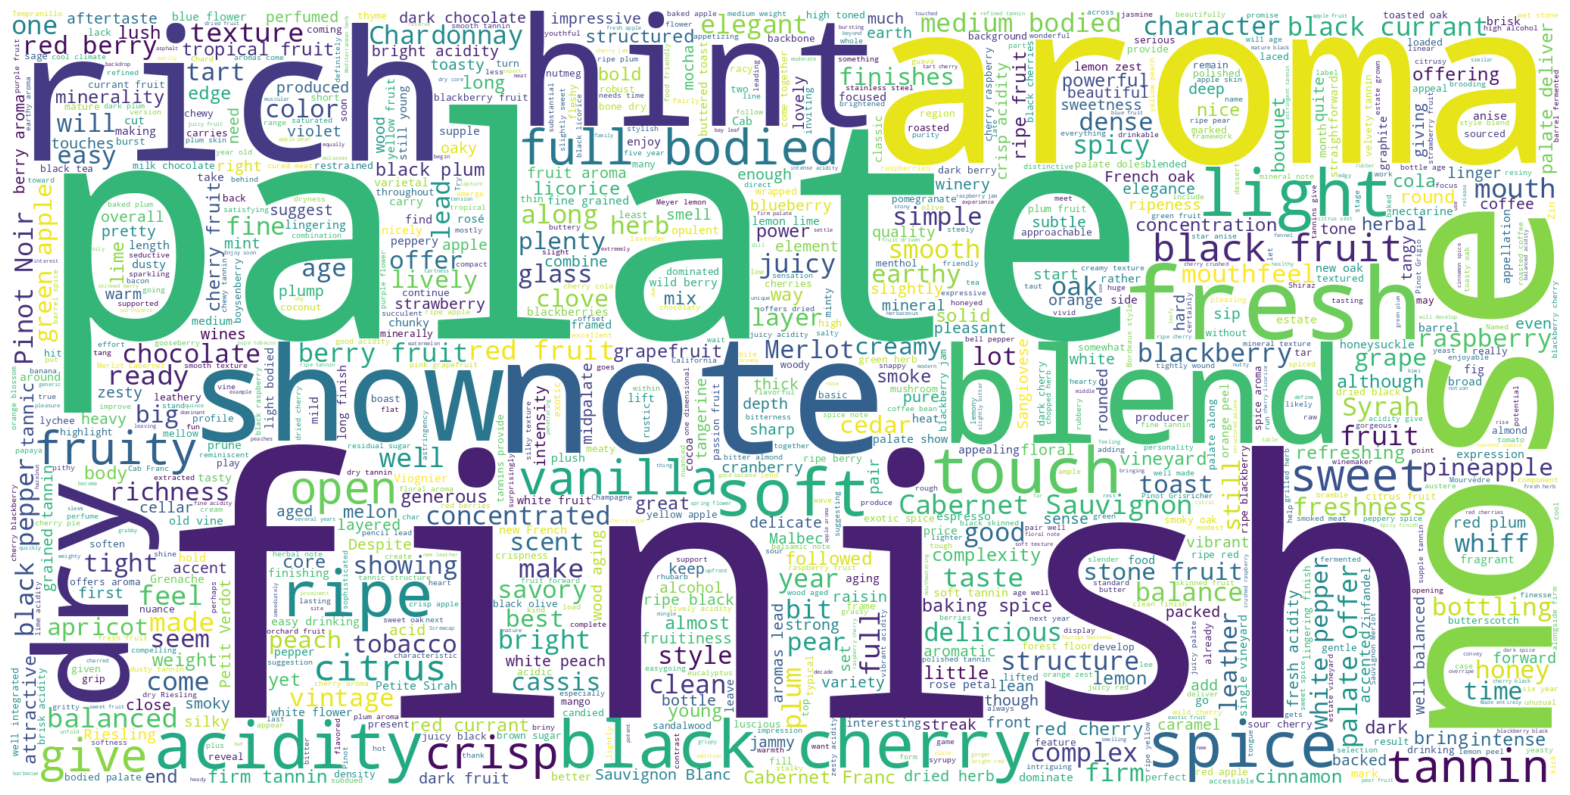

In [53]:
plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

**Análises que serão utilizadas nas 3 novas perguntas criadas**



**Observação: a explicação das análises estará na resposta da pergunta (lá na parte de CONCLUSÂO)**

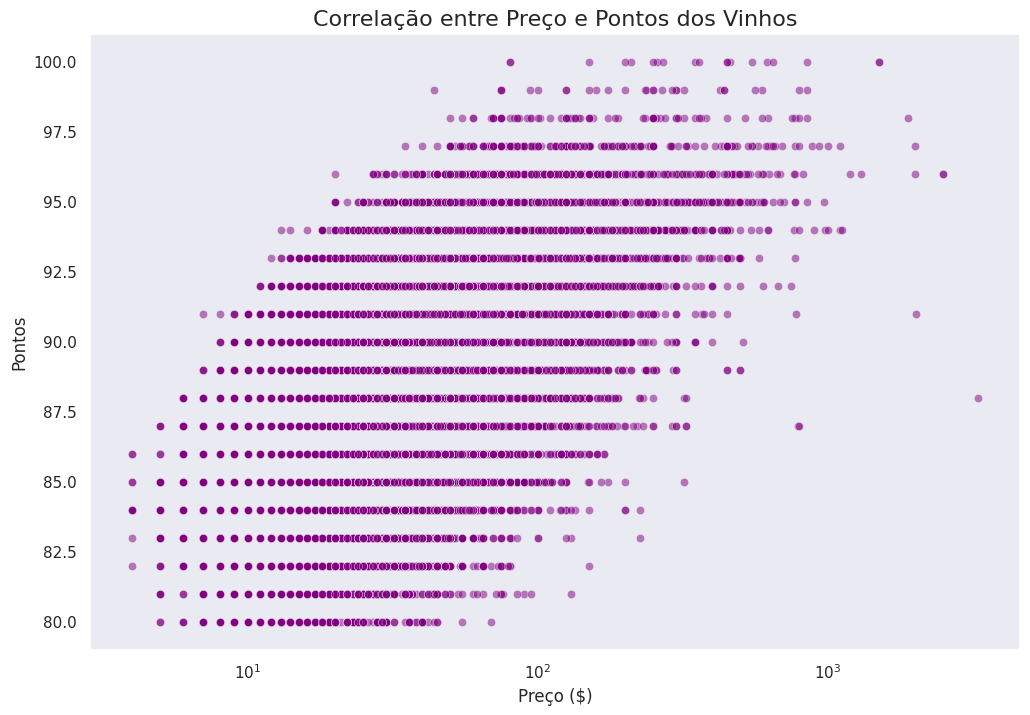

Coeficiente de correlação entre preço e pontos: 0.42


In [55]:
# Analisando a correlação entre preço e pontos
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='price', y='points', color='purple', alpha=0.5)
plt.title('Correlação entre Preço e Pontos dos Vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Pontos')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid()
plt.show()

# Cálculo do coeficiente de correlação
correlation = df1['price'].corr(df1['points'])
print(f'Coeficiente de correlação entre preço e pontos: {correlation:.2f}')

<ipython-input-60-a73535d3381e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='points', y='country_province', palette='Purples')


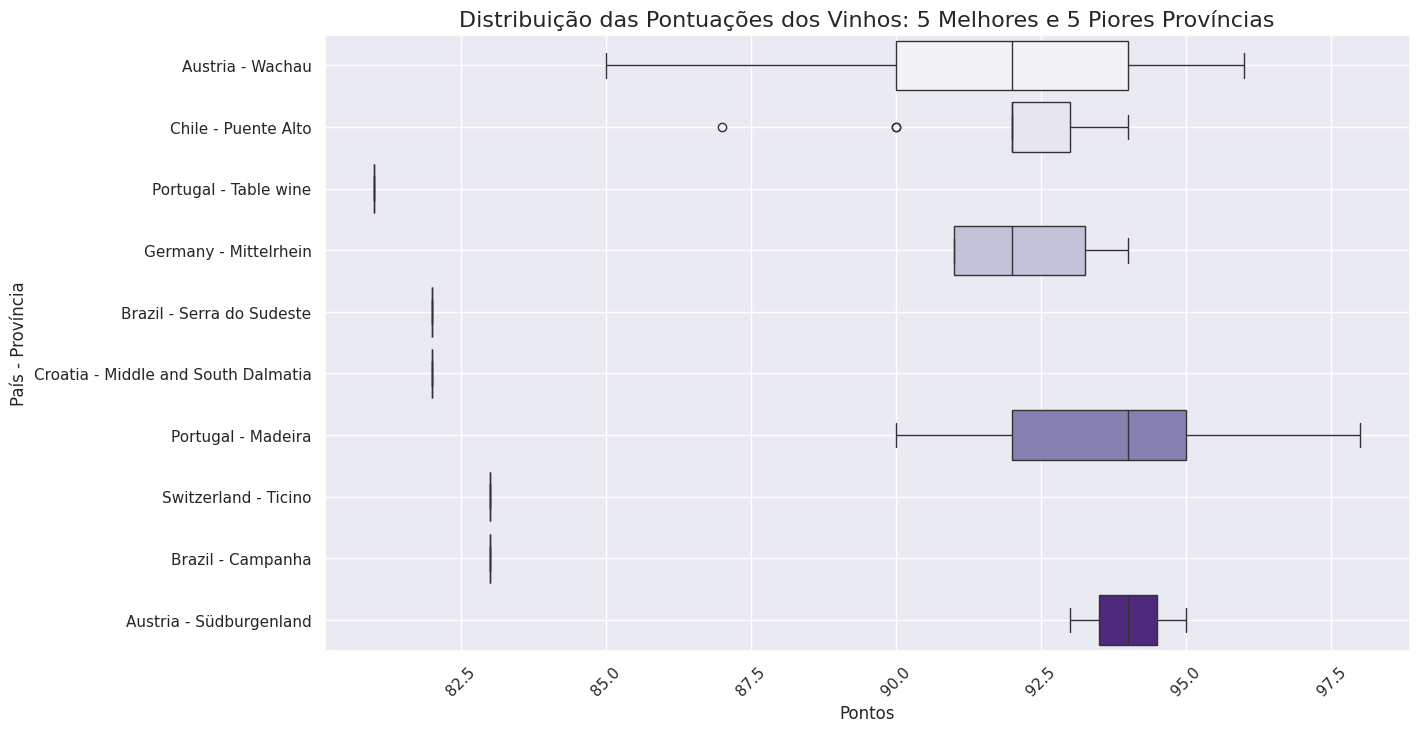

In [60]:
# Adicionando uma coluna que combina país e província
df1['country_province'] = df1['country'] + ' - ' + df1['province']

# Calculando a média dos pontos por província
average_points_by_province = df1.groupby('country_province')['points'].mean()

# Obtendo as 5 melhores e 5 piores províncias
top_5_provinces = average_points_by_province.nlargest(5)
bottom_5_provinces = average_points_by_province.nsmallest(5)

# Combinando as províncias em um novo DataFrame
selected_provinces = pd.concat([top_5_provinces, bottom_5_provinces])

# Filtrando o DataFrame original para incluir apenas as províncias selecionadas
filtered_df = df1[df1['country_province'].isin(selected_provinces.index)]

# Plotando a distribuição das pontuações dos vinhos por província e país selecionados
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='points', y='country_province', palette='Purples')
plt.title('Distribuição das Pontuações dos Vinhos: 5 Melhores e 5 Piores Províncias', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País - Província')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()





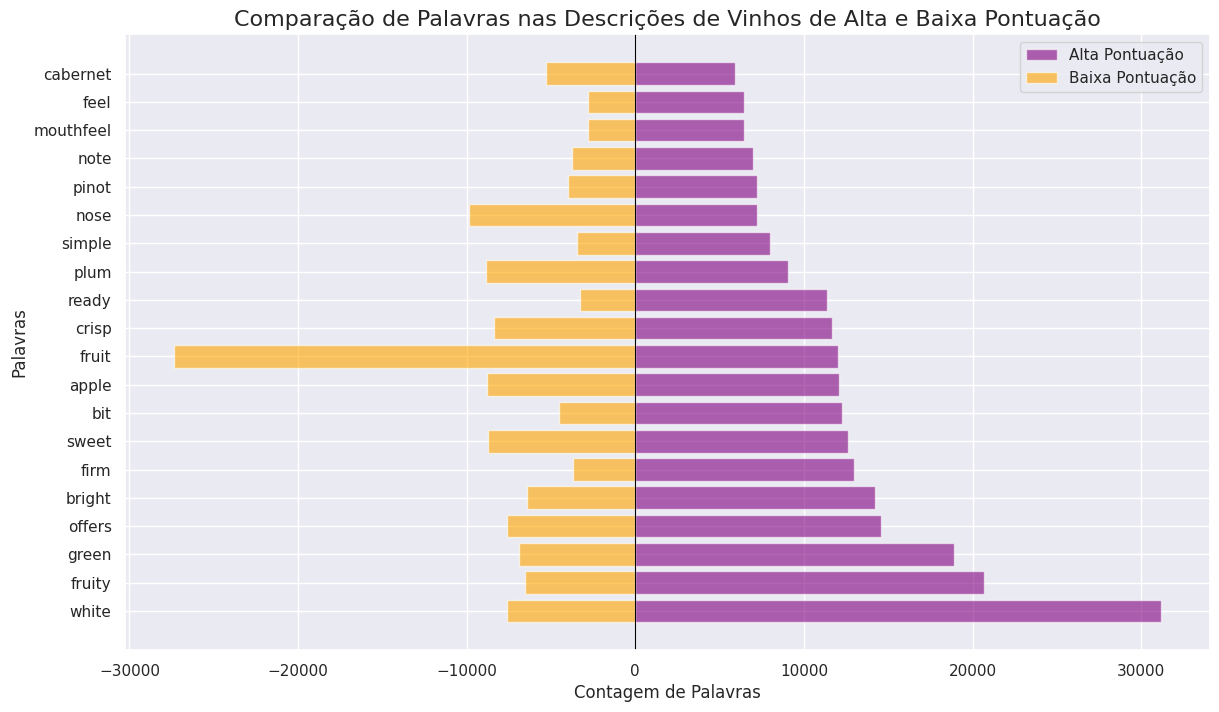

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Definindo um limite de pontuação para "alta pontuação"
high_score_threshold = 90

# Filtrando vinhos de alta e baixa pontuação
high_score_wines = df1[df1['points'] >= high_score_threshold]
low_score_wines = df1[df1['points'] < high_score_threshold]

# Contando palavras nas descrições
vectorizer = CountVectorizer(stop_words='english', max_features=100)
high_score_word_count = vectorizer.fit_transform(high_score_wines['description'])
low_score_word_count = vectorizer.fit_transform(low_score_wines['description'])

# Somando as contagens de palavras
high_score_word_sum = high_score_word_count.sum(axis=0)
low_score_word_sum = low_score_word_count.sum(axis=0)

# Criando DataFrames para as palavras e suas contagens
high_score_words = pd.DataFrame(high_score_word_sum, columns=vectorizer.get_feature_names_out())
low_score_words = pd.DataFrame(low_score_word_sum, columns=vectorizer.get_feature_names_out())

# Somando as contagens em formato adequado
high_score_words = high_score_words.T.reset_index()
low_score_words = low_score_words.T.reset_index()

# Renomeando colunas
high_score_words.columns = ['word', 'count']
low_score_words.columns = ['word', 'count']

# Merge para comparar
word_comparison = high_score_words.merge(low_score_words, on='word', suffixes=('_high', '_low'))
word_comparison['ratio'] = word_comparison['count_high'] / word_comparison['count_low']

# Selecionando as palavras mais significativas
top_words = word_comparison.sort_values(by='count_high', ascending=False).head(20)

# Plotando as palavras
plt.figure(figsize=(14, 8))
plt.barh(top_words['word'], top_words['count_high'], color='purple', label='Alta Pontuação', alpha=0.6)
plt.barh(top_words['word'], -top_words['count_low'], color='orange', label='Baixa Pontuação', alpha=0.6)
plt.title('Comparação de Palavras nas Descrições de Vinhos de Alta e Baixa Pontuação', fontsize=16)
plt.xlabel('Contagem de Palavras')
plt.ylabel('Palavras')
plt.axvline(0, color='black', lw=0.8)
plt.legend()
plt.show()


## **Conclusão**

**De onde vem o melhor vinho?**

R: A Inglaterra é quem em média produz vinhos soberbos, mas se você quiser uma garrafa de pontuação perfeita de 100 deve  obeservar os vinhos de outros países: França, Itália, EUA, Portugal ou Austrália.

**O preço do vinho está relacionado com a qualidade?**

R: É nítido que o preço do vinho está relacionado com a qualidade. Mas se você souber onde procurar, pode encontrar um vinho de 4 dólares que possui apenas 3 pontos abaixo de uma garrafa que custa 3000 dólares.

**Certas variedades de uvas são de maior qualidade?**

R: Todas as variedades estão na mesma situação (niveladas). A maior aposta com base nos dados é a Pinot Noir.

**Qual é o melhor vinho em cada faixa de preço?**

Encontramos um vinho perfeito para cada orçamento. Até 15 dólares tem o vinho português chamado "Portuguese Red", custando apenas 13 dólares e tendo uma pontuação de 94 na classificação. Entre 15 e 30 dólares tem o vinho americano chamado "Syrah", custando apenas 20 dólares e tendo uma pontuação de 96 na classificação. Entre 30 e 50 dólares tem o vinho americano chamado "Chardonnay", custando 44 dólares e com uma pontuação de 99 na classificação, e por fim, acima de 50 dólares encontramos também outro vinho americano chamado "Syrah", custando 80 dólares e tendo uma pontuação de 100 na classificação.

**Que palavras são mais utilizadas para descrever um vinho?**

R: Como podemos ver na nuvem de palavras, certos termos aparecem uma vez ou outra nas descrições, termos como "finish", "palate", "aroma", "nose", "rich", entre outras, aparecem em boa parte das avaliações

**Existe uma correlação entre preço e pontos dos vinhos?**

Sim, existe. O coeficiente de correlação entre o preço e os pontos é  de 0.42, como mostra no gráfico a seguir:

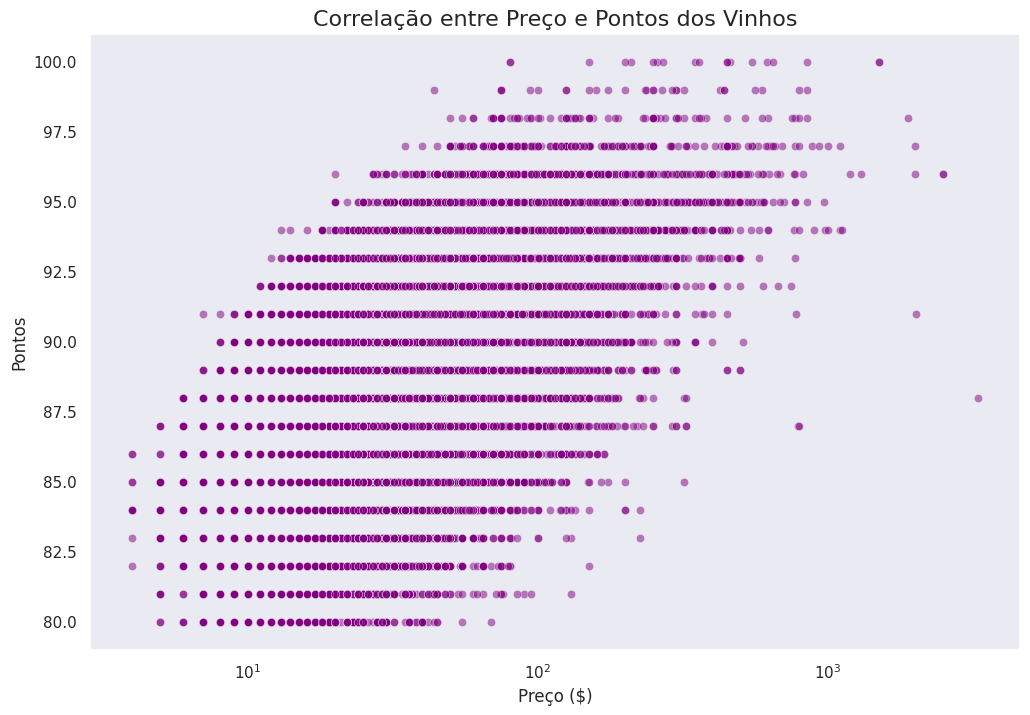

Coeficiente de correlação entre preço e pontos: 0.42


In [56]:
# Analisando a correlação entre preço e pontos
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='price', y='points', color='purple', alpha=0.5)
plt.title('Correlação entre Preço e Pontos dos Vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Pontos')
plt.xscale('log')  # Usar escala logarítmica para melhor visualização
plt.grid()
plt.show()

# Cálculo do coeficiente de correlação
correlation = df1['price'].corr(df1['points'])
print(f'Coeficiente de correlação entre preço e pontos: {correlation:.2f}')

Pode-se notar que quanto menor o preço, menor também será a pontuação do vinho e quanto maior o preço, maior será a tendência da sua pontuação. Claro que existe exceções, mas a relação é bem visível.

**O local onde a uva é produzida interfere?**

Sim, podemos observar pelo gráfico que os 5 melhores países onde se encontram os melhores vinhos e os mais caros, utilizam as suas próprias uvas produzidas nas provincias (Portugal e Austrália), enquanto os 5 piores provincias, contem alguns países que não tem tanto reconhecimento nesse ramo (Brasil, Croacia e Suiça).

<ipython-input-61-1eb880c4609a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='points', y='country_province', palette='Purples')


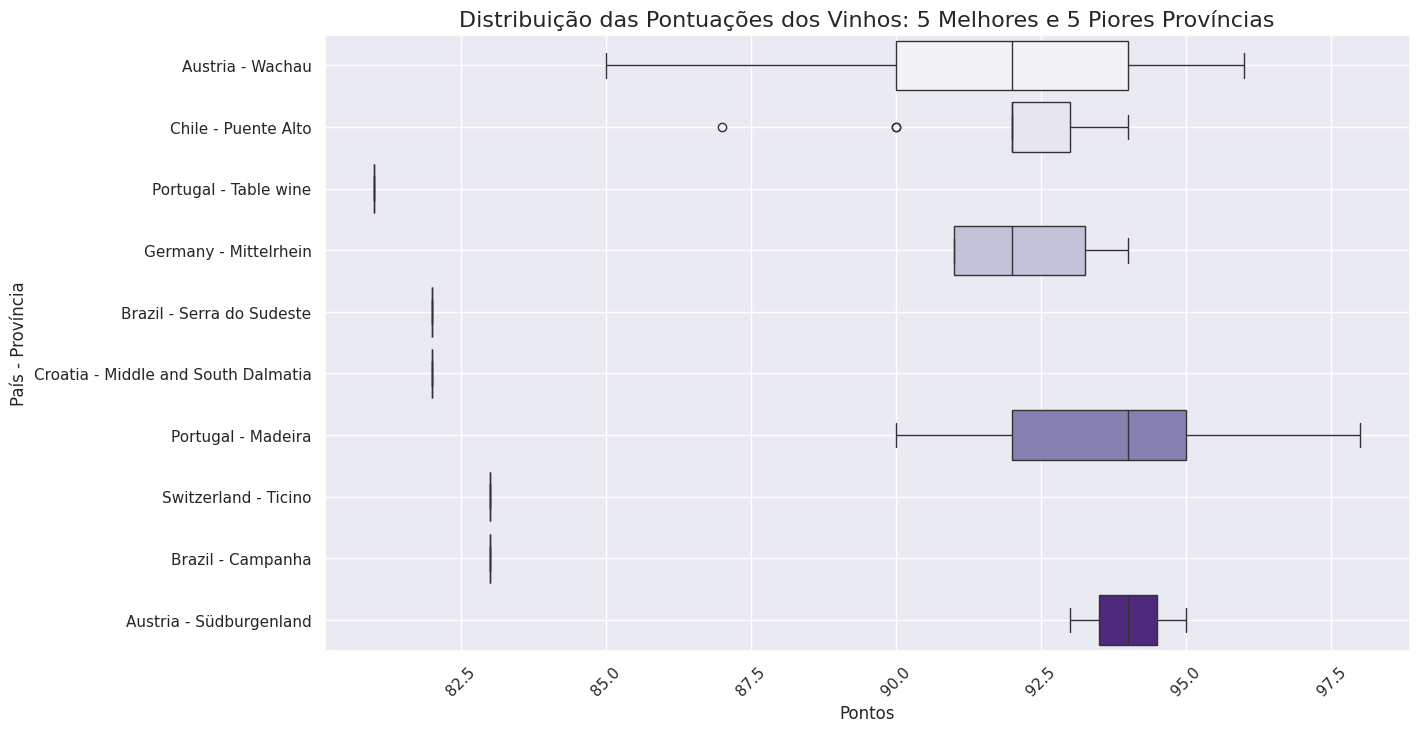

In [61]:
# Adicionando uma coluna que combina país e província
df1['country_province'] = df1['country'] + ' - ' + df1['province']

# Calculando a média dos pontos por província
average_points_by_province = df1.groupby('country_province')['points'].mean()

# Obtendo as 5 melhores e 5 piores províncias
top_5_provinces = average_points_by_province.nlargest(5)
bottom_5_provinces = average_points_by_province.nsmallest(5)

# Combinando as províncias em um novo DataFrame
selected_provinces = pd.concat([top_5_provinces, bottom_5_provinces])

# Filtrando o DataFrame original para incluir apenas as províncias selecionadas
filtered_df = df1[df1['country_province'].isin(selected_provinces.index)]

# Plotando a distribuição das pontuações dos vinhos por província e país selecionados
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='points', y='country_province', palette='Purples')
plt.title('Distribuição das Pontuações dos Vinhos: 5 Melhores e 5 Piores Províncias', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País - Província')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Quais características das descrições estão associadas a vinhos de alta pontuação?**

Nessa pergunta, resolvi fazer uma comparação de palavras utilizadas em descrições de vinhos com alta pontuação na classificação e com baixa também. segue a análise:

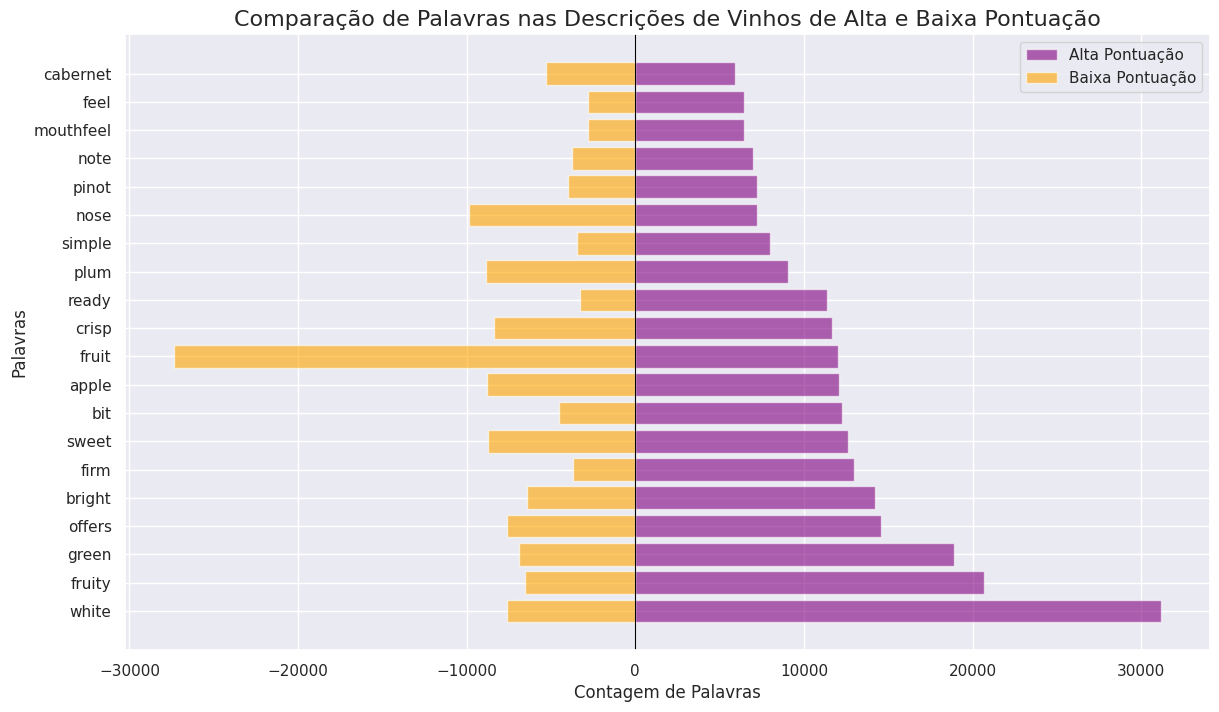

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Definindo um limite de pontuação para "alta pontuação"
high_score_threshold = 90

# Filtrando vinhos de alta e baixa pontuação
high_score_wines = df1[df1['points'] >= high_score_threshold]
low_score_wines = df1[df1['points'] < high_score_threshold]

# Contando palavras nas descrições
vectorizer = CountVectorizer(stop_words='english', max_features=100)
high_score_word_count = vectorizer.fit_transform(high_score_wines['description'])
low_score_word_count = vectorizer.fit_transform(low_score_wines['description'])

# Somando as contagens de palavras
high_score_word_sum = high_score_word_count.sum(axis=0)
low_score_word_sum = low_score_word_count.sum(axis=0)

# Criando DataFrames para as palavras e suas contagens
high_score_words = pd.DataFrame(high_score_word_sum, columns=vectorizer.get_feature_names_out())
low_score_words = pd.DataFrame(low_score_word_sum, columns=vectorizer.get_feature_names_out())

# Somando as contagens em formato adequado
high_score_words = high_score_words.T.reset_index()
low_score_words = low_score_words.T.reset_index()

# Renomeando colunas
high_score_words.columns = ['word', 'count']
low_score_words.columns = ['word', 'count']

# Merge para comparar
word_comparison = high_score_words.merge(low_score_words, on='word', suffixes=('_high', '_low'))
word_comparison['ratio'] = word_comparison['count_high'] / word_comparison['count_low']

# Selecionando as palavras mais significativas
top_words = word_comparison.sort_values(by='count_high', ascending=False).head(20)

# Plotando as palavras
plt.figure(figsize=(14, 8))
plt.barh(top_words['word'], top_words['count_high'], color='purple', label='Alta Pontuação', alpha=0.6)
plt.barh(top_words['word'], -top_words['count_low'], color='orange', label='Baixa Pontuação', alpha=0.6)
plt.title('Comparação de Palavras nas Descrições de Vinhos de Alta e Baixa Pontuação', fontsize=16)
plt.xlabel('Contagem de Palavras')
plt.ylabel('Palavras')
plt.axvline(0, color='black', lw=0.8)
plt.legend()
plt.show()